# LOGISTIC REGRESSION 

# **1. Introduction**

This dataset is originally from the National Institure of Diabetes and Digestice and Kidney Diseases. The dataset consists of women from the Indian Pima tribe. 

**Independent Variables**
1. Pregnat
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DPF = DiabetesPedigreeFunction
8. Age

**Dependent Variable**
Outcome

## Aim of the modelling 
1. Predicts whether or not patiens in the dataset have diabetes
2. understanding the influence of significant factor that trul affects them. 

# **2. Load Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

# **3. Data Preparation**

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness':'ST'},inplace=True)

In [5]:
data.head()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BP           768 non-null    int64  
 3   ST           768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies    0
Glucose        0
BP             0
ST             0
Insulin        0
BMI            0
DPF            0
Age            0
Outcome        0
dtype: int64

In [9]:
data.duplicated().sum()

0

# **4. DATA EXPLORATION**

<Axes: title={'center': 'Correlation Matrix'}>

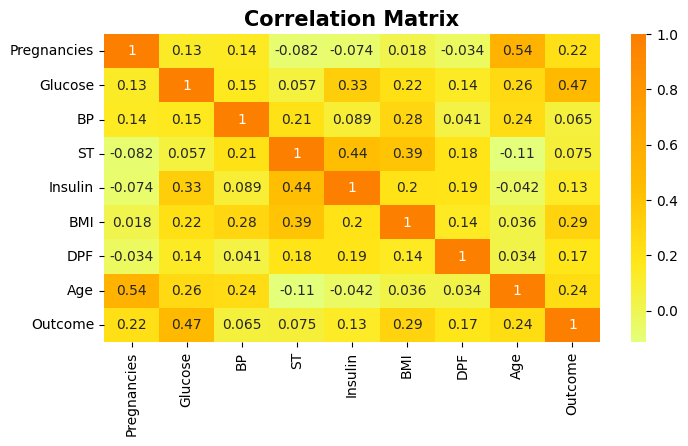

In [14]:
plt.figure(figsize=(8,4), edgecolor ="black")
plt.title("Correlation Matrix",color="black",fontweight='bold', fontsize=15)
corr=data.corr()
sns.heatmap(corr, cmap='Wistia', annot=True, cbar=True)

# **5. Model fitting**

## Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.20, random_state=42)

## Fitting Logistic Regression

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [20]:
formula = ('Outcome ~ Pregnancies + Glucose + BP + ST + Insulin + BMI + DPF + Age')
model = logit(formula=formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6


# **6. INTERPRETATION OF MODEL SUMMARY**

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.2752
Time:                        10:55:46   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.0359      0.837    -10.802      0.000     -10.675      -7.396
Pregnancies     0.0645      0.036      1.791      0.073      -0.006       0.135
Glucose         0.0341      0.004      8.055      0.000       0.026       0.042
BP             -0.0139      0.006     -2.260      0.024      -0.026      -0.002
ST              0.0031      0.008      0.397      0.691      -0.012       0.019
Insulin        -0.0018      0.001     -1.782      0.075      -0.004       0.000
BMI             0.1026      0.017      5.948      0.000       0.069       0.136
DPF             0.6945      0.330      2.107      0.035       0.049       1.341
Age             0.0371      0.011      3.400      0.001       0.016       0.058
===============================================================================
"""

## ODDs Ration

In [21]:
print(np.exp(model.params))

Intercept      0.000119
Pregnancies    1.066675
Glucose        1.034695
BP             0.986207
ST             1.003154
Insulin        0.998185
BMI            1.108059
DPF            2.002724
Age            1.037783
dtype: float64


## Marginal Effects Computation

In [15]:
# perhitungan efek marginal 
AME = model.get_margeff(at ='overall', method='dydx')
print (AME.summary())

        Logit Marginal Effects       
Dep. Variable:                Outcome
Method:                          dydx
At:                           overall
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0098      0.005      1.807      0.071      -0.001       0.021
Glucose                      0.0052      0.001     10.107      0.000       0.004       0.006
BloodPressure               -0.0021      0.001     -2.291      0.022      -0.004      -0.000
SkinThickness                0.0005      0.001      0.398      0.691      -0.002       0.003
Insulin                     -0.0003      0.000     -1.797      0.072      -0.001    2.51e-05
BMI                          0.0156      0.002      6.584      0.000       0.011       0.020
DiabetesPedigreeFunction     0.1059      0.050      2.132      0.033       0.009       0.203
Age        

# **MODEL EVALUATION**

## Confusion Matrix

In [17]:
from sklearn.metrics import classification_report , accuracy_score

prediction = model.predict(exog = test_data)
cutoff = 0.5
y_prediction = np.where(prediction > cutoff, 1,0)
y_actual = test_data['Outcome']
conf_matrix = pd.crosstab(y_actual, y_prediction, rownames=["Actual"], colnames={"Predicted"}, margins=True)
print (conf_matrix)

Predicted   0   1  All
Actual                
0          79  20   99
1          18  37   55
All        97  57  154


## Classification Accuracy

In [18]:
# accuracy classification
accuracy = accuracy_score(y_actual, y_prediction)
print('Accuracy :%.2f' % accuracy + "%")

Accuracy :0.75%


## Classification Report

In [19]:
# laporan klasifikasi 
print (classification_report(y_actual,y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

